<a href="https://colab.research.google.com/github/sgangavaram/FMML2023/blob/MODULE-2/Module2_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 2: Principal Components Analysis (PCA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [11]:
breast_data = load_breast_cancer().data
print("Features:", breast_data.shape)
breast_labels = np.reshape(load_breast_cancer().target, (569,1))
print("Target:", breast_labels.shape)

Features: (569, 30)
Target: (569, 1)


In [10]:
final_breast_data = np.concatenate([breast_data, breast_labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = load_breast_cancer().feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
X = breast_dataset.iloc[:,:30].values
y = breast_dataset.iloc[:,30].values

print(np.shape(X), np.shape(y))

(569, 30) (569,)


## 1. Standardization of the data

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(np.std(X_std))

1.0


In [8]:
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = features
X_std_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## 2. Computing the covariance matrix

In [9]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = 1/ (X_std.shape[0]-1) * (X_std - mean_vec).T.dot(X_std - mean_vec)
print(cov_mat[0:45, 0:545])

[[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  1.19415220e-01]
 [ 9.9

In [12]:
cov_mat.shape

(30, 30)

In [13]:
cov_mat_numpy = np.cov(X_std.T)
print(cov_mat_numpy[0:45, 0:45])

[[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  1.19415220e-01]
 [ 9.9

## 3. Calculating the eigenvectors and eigenvalues

In [14]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals.shape, eig_vecs.shape

((30,), (30, 30))

## 4. Computing the Principal Components

Explained variance:
[44.27202560752635, 18.971182044033085, 9.393163257431393, 6.602134915470151, 5.495768492346255, 4.0245220398833546, 2.250733712982508, 1.5887238000213262, 1.3896493745591088, 1.1689781894131472, 0.9797189875980173, 0.870537900737884, 0.8045249871967302, 0.5233657454926353, 0.31378321676273985, 0.26620933651523176, 0.19799679253242683, 0.17539594502263636, 0.1649253059225157, 0.10386467483387138, 0.0999096463700257, 0.09146467510543423, 0.08113612588991044, 0.06018335666716721, 0.05160423791652017, 0.02725879954774855, 0.0230015462505957, 0.005297792903809204, 0.0024960103246895395, 0.00044348274273613787]
Cumulative explained variance:
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.

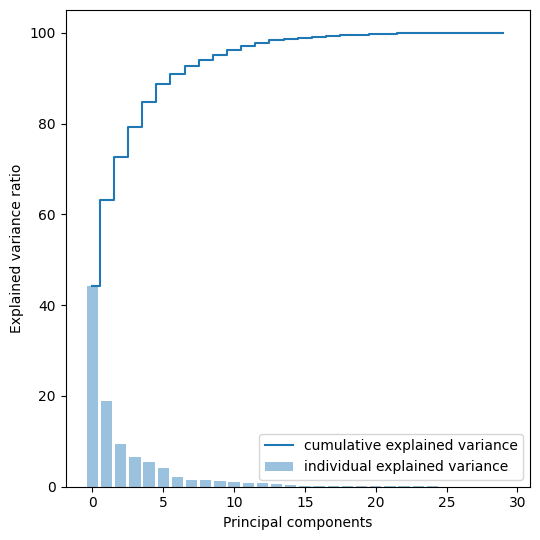

In [15]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("Explained variance:")
print(var_exp)

cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:")
print(cum_var_exp)

plt.figure(figsize=(5.5 , 5.5))
plt.bar(range(30), var_exp, alpha=0.45, align='center', label='individual explained variance')
plt.step(range(30), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 5. Reducing the dimensions of the data set

In [20]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1), eig_pairs[1][1].reshape(30,1), eig_pairs[2][1].reshape(30,1)))
Y = X_std.dot(matrix_w)
print(Y)

[[ 9.19283683  1.94858307 -1.12316616]
 [ 2.3878018  -3.76817174 -0.52929269]
 [ 5.73389628 -1.0751738  -0.55174759]
 ...
 [ 1.25617928 -1.90229671  0.56273053]
 [10.37479406  1.67201011 -1.87702933]
 [-5.4752433  -0.67063679  1.49044308]]


In [19]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)
print(Y_sklearn)

[[ 9.19283685  1.94858038 -1.12319112]
 [ 2.38780181 -3.76817346 -0.52930808]
 [ 5.73389627 -1.0751719  -0.55172956]
 ...
 [ 1.25617926 -1.90229438  0.56275179]
 [10.37479406  1.67200967 -1.87703318]
 [-5.47524327 -0.67064138  1.49040209]]


## Our dataset in 2 and 3 dimensions.

In [21]:
final_df = pd.DataFrame(columns=["PC1", "PC2", "PC3", "Label"])
for i in range(len(Y)):
    dicti = dict()
    dicti["PC1"] = Y[i, 0]
    dicti["PC2"] = Y[i, 1]
    dicti["PC3"] = Y[i, 2]
    if (int(breast_labels[i][0]) == 0):
      dicti["Label"] = "Benign"
    else:
      dicti["Label"] = "Malignant"
    final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)
final_df.head()

,PC1,PC2,PC3,Label
0,9.192837,1.948583,-1.123166,Benign
1,2.387802,-3.768172,-0.529293,Benign
2,5.733896,-1.075174,-0.551748,Benign
3,7.122953,10.275589,-3.232790,Benign
4,3.935302,-1.948072,1.389767,Benign


In [25]:
import plotly.graph_objects as go
import plotly.express as px
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_label = final_df.Label.tolist()
for_hover = final_df.Label.tolist()
fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="Principal Component Axis",
                 color_discrete_map={"Benign": "red", "Malignant": "violet"})
fig.update_layout(
    xaxis=dict(title = 'PC1', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#222222',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Black"))
fig.update_traces(marker=dict(size=5,))
fig.show(renderer = "colab")

## Question:

**Referring to the plot above, can you reason why PCA can be a good candidate before training models for Machine learning?**

## Answer:

Principal Component Analysis (PCA) is a helpful method used in machine learning before teaching models. There are several reasons why it's good for preparing data before training a model:

1. **Too Many Numbers (Curse of Dimensionality):** When there are too many features, PCA helps by reducing them.

2. **Features that are Too Related (Multicollinearity):** If some features are closely connected, PCA can handle that.

3. **Getting Rid of Unnecessary Details (Noise Reduction):** PCA filters out unnecessary information in the data.

4. **Works Faster (Computational Efficiency):** It helps the model work faster by simplifying the data.

5. **Seeing the Big Picture (Visualization):** PCA aids in visualizing complex data in simpler terms.

6. **Understanding the Model (Model Interpretability):** It makes the model easier to understand.

7. **Better Model Results (Improved Model Performance):** Using PCA often leads to better model performance.

8. **Avoiding Duplicate Information (Handling Redundant Information):** It manages and removes redundant information in the data.

In short, PCA is a useful tool before training a machine learning model, especially when the dataset has a lot of features. It solves problems like having too many features, features being too related, and helps the model work more efficiently while keeping the necessary information for accurate training.

Let us now try and visualize this in the first 3 Principal Components space.

In [26]:
fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=5,))
fig.show(renderer = "colab")

## Interactive plot by PLOTLY with Iris dataset.




In [27]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_standardized = (X - X.mean()) / X.std()
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Target'] = y
fig = px.scatter(pc_df, x='PC1', y='PC2', color='Target',
                 title='PCA of Iris Dataset',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'})
fig.show()